# Diabetes Prediction

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv("diabetes.csv")

In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [101]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [102]:
df.shape

(768, 9)

In [103]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [104]:
df.duplicated().sum()

np.int64(0)

In [105]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [106]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [107]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [108]:
df = df.drop(['Insulin', 'SkinThickness'],axis=1)

In [109]:
miss_col = ['Glucose', 'BloodPressure', 'BMI']
df[miss_col] = df[miss_col].replace(0, np.nan)
df[miss_col] = df[miss_col].fillna(df[miss_col].mode())
df.isna().sum().sum()

np.int64(51)

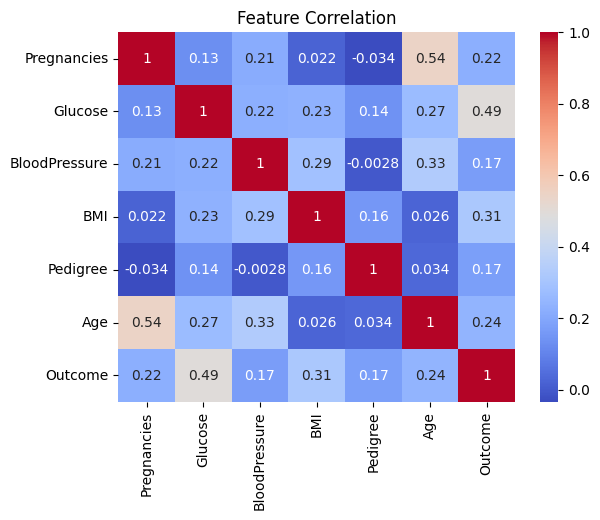

In [110]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

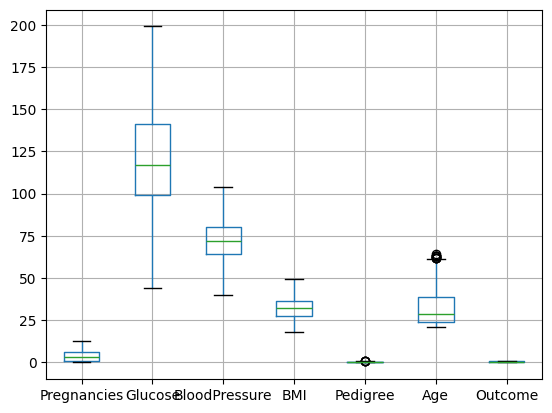

In [118]:
df.boxplot(column=df.columns.tolist())
plt.show()

In [117]:
col_outlier = ['Pregnancies','BloodPressure','BMI','Pedigree','Age']
for i in col_outlier:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  bawah = Q1 - 1.5 * IQR
  atas = Q3 + 1.5 * IQR

  median = df[i].median()
  df[i] = np.where((df[i] < bawah) | (df[i] > atas), median, df[i])

In [113]:
X = df.iloc[:, 0:5]
y = df.iloc[:, 6]

In [114]:
def split_data_train_test(X, y, train_size=0.8, random_state=0):
  np.random.seed(random_state)
  idx = np.random.permutation(len(X))
  split = int(0.8 * len(X))

  X_train = df.drop('Outcome', axis=1).iloc[idx[:split]].values
  X_test  = df.drop('Outcome', axis=1).iloc[idx[split:]].values
  y_train = df['Outcome'].iloc[idx[:split]].values
  y_test  = df['Outcome'].iloc[idx[split:]].values

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data_train_test(X, y)

model

In [115]:
def minkowski_distance(X1, X2, p=2):
    return np.sum(np.abs(X1[:, np.newaxis] - X2)**p, axis=2)**(1/p)



In [116]:
def knn_predict(X_train, y_train, X_test, k=5, p=2, weights='uniform'):
    distances = minkowski_distance(X_test, X_train, p)
    k_indices = np.argsort(distances, axis=1)[:, :k]
    k_labels = y_train[k_indices]
    
    if weights == 'uniform':
        predictions = []
        for labels in k_labels:
            unique, counts = np.unique(labels, return_counts=True)
            predictions.append(unique[np.argmax(counts)])
        return np.array(predictions)

y_pred = knn_predict(X_train, y_train, X_test, k=best_k, p=best_p)

NameError: name 'best_k' is not defined

In [ ]:
def smote(X_minority, y_minority, n_samples, k=5, p=2):
    n_minority = len(X_minority)
    synthetic = []
    
    for i in range(n_samples):
        idx = np.random.randint(0, n_minority)
        distances = minkowski_distance(X_minority[idx].reshape(1, -1), X_minority, p)[0]
        k_indices = np.argsort(distances)[1:k+1]
        nn_idx = np.random.choice(k_indices)
        diff = X_minority[nn_idx] - X_minority[idx]
        synthetic_sample = X_minority[idx] + np.random.rand() * diff
        synthetic.append(synthetic_sample)
    
    return np.array(synthetic), np.ones(len(synthetic), dtype=int)

In [ ]:
def evaluate(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    confusion = np.array([[tn, fp], [fn, tp]])
    
    return accuracy, precision, recall, f1, confusion

In [ ]:
def classification_report(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positive
    tn = np.sum((y_true == 0) & (y_pred == 0))  # True Negative
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positive
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negative
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0      # Sensitivitas
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Presisi
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print("📊 Hasil Evaluasi:")
    print(f"✅ Recall (deteksi diabetes): {recall:.2%}")
    print(f"✅ Precision: {precision:.2%}")
    print(f"✅ F1-Score: {f1:.2%}")
    print(f"✅ Akurasi: {accuracy:.2%}")
    print(f"❗ False Negative: {fn} dari {tp+fn} kasus diabetes")
    return recall, precision, f1, accuracy

# Jalankan evaluasi
recall, prec, f1, acc = classification_report(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
def kfold_cv(X, y, k_values, p_values, n_folds=5, smote_k=5, weights='uniform', random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    fold_size = len(X) // n_folds
    best_k, best_p, best_f1 = None, None, 0
    results = {}
    
    for k in k_values:
        for p in p_values:
            fold_f1s = []
            for fold in range(n_folds):
                start = fold * fold_size
                end = start + fold_size if fold < n_folds - 1 else len(X)
                val_idx = indices[start:end]
                train_idx = np.concatenate([indices[:start], indices[end:]])
                
                X_train, y_train = X[train_idx], y[train_idx]
                X_val, y_val = X[val_idx], y[val_idx]
                
                # SMOTE di train
                minority_idx = y_train == 1
                X_minority = X_train[minority_idx]
                y_minority = y_train[minority_idx]
                n_majority = np.sum(~minority_idx)
                n_to_sample = n_majority - len(X_minority)
                
                if n_to_sample > 0:
                    X_synth, y_synth = smote(X_minority, y_minority, n_to_sample, k=smote_k, p=p)
                    X_train = np.vstack([X_train, X_synth])
                    y_train = np.hstack([y_train, y_synth])
                
                y_pred = knn_predict(X_train, y_train, X_val, k=k, p=p, weights=weights)
                _, _, _, f1, _ = evaluate(y_val, y_pred)
                fold_f1s.append(f1)
            
            mean_f1 = np.mean(fold_f1s)
            results[(k, p)] = mean_f1
            if mean_f1 > best_f1:
                best_f1 = mean_f1
                best_k = k
                best_p = p
    
    return best_k, best_p, results


In [ ]:
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0) + 1e-8)

In [ ]:
k_values = [1, 3, 5, 7, 9, 11]
p_values = [1, 2, 3]
best_k, best_p, results = kfold_cv(X, y, k_values, p_values)

KeyError: "None of [Index([462,  60, 618, 346, 294, 231, 340, 535, 306, 718,\n       ...\n       466, 121, 614,  20, 700,  71, 106, 270, 435, 102],\n      dtype='int64', length=615)] are in the [columns]"

In [ ]:
minority_idx = y_train == 1
X_minority = X_train[minority_idx]
n_majority = np.sum(~minority_idx)
n_to_sample = n_majority - len(X_minority)
if n_to_sample > 0:
    X_synth, y_synth = smote(X_minority, None, n_to_sample, k=5, p=best_p)
    X_train = np.vstack([X_train, X_synth])
    y_train = np.hstack([y_train, np.ones(n_to_sample, dtype=int)])

NameError: name 'y_train' is not defined

In [ ]:
y_pred = knn_predict(X_train, y_train, X_test, k=best_k, p=best_p)
acc, prec, rec, f1, conf = evaluate(y_test, y_pred)